# Name: SHUBHAM SWARNAKAR

# Task 6: Prediction using Decision Tree Algorithm

In [1]:
# Importing all the neccessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load and Read Dataset

In [2]:
# Load and read an inbuild 'iris' dataset

iris = load_iris()
data_f = pd.DataFrame(data=np.c_[iris["data"], iris["target"]],
                      columns=iris.feature_names + ["target"])

In [3]:
data_f.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# let's assign the value for each target  
#0:setosa, 1:versicolor, 2:virginica

print(np.unique(iris.target))
iris.target_names

[0 1 2]


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
def names(a):
    if(a==0): return "Iris-setosa"
    elif(a==1): return "Iris-Versicolor"
    else: return "Iris-Virginica"
    
data_f["target_name"] = data_f["target"].apply(names)

data_f.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0.0,Iris-setosa
1,4.9,3.0,1.4,0.2,0.0,Iris-setosa
2,4.7,3.2,1.3,0.2,0.0,Iris-setosa
3,4.6,3.1,1.5,0.2,0.0,Iris-setosa
4,5.0,3.6,1.4,0.2,0.0,Iris-setosa


In [6]:
# let's check the nulls if there are any

data_f.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64

In [7]:
# print the shape of the dataset

data_f.shape

(150, 6)

In [8]:
data = data_f.values

x = data[:,0:4]
y = data[:,4]

In [9]:
y_data = np.array([np.average(x[:,i][y==j]) for i in range(x.shape[1]) for j in (np.unique(y))])
y_data = y_data.reshape(4,3)
y_data = np.swapaxes(y_data, 0,1)

x_axis = np.arange(len(data_f.columns)-2)
width = 0.2

# Visual Represantation

# Train Test Split

In [10]:
x = data_f.drop(["target", "target_name"], axis = "columns")
y = data_f["target"]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = .2, random_state = 420)

# Decision Tree Classifier Model

In [11]:
model_dt = DecisionTreeClassifier()


# let's fit the model
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [12]:
model_dt.predict(x_test)

array([1., 2., 2., 0., 0., 1., 0., 1., 2., 1., 2., 1., 0., 0., 2., 1., 0.,
       0., 0., 0., 0., 2., 1., 0., 1., 1., 0., 0., 1., 1.])

In [13]:
model_dt.score(x_test, y_test)

1.0

# Cross Validation Score Function

In [14]:
from sklearn.model_selection import cross_val_score, ShuffleSplit

cv = ShuffleSplit(n_splits=6, test_size = .2)

arr = cross_val_score(DecisionTreeClassifier(), x, y, cv= cv)

print(list(arr))
print("Average Score:", np.mean(arr))

[0.8666666666666667, 0.9333333333333333, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667]
Average Score: 0.9555555555555556


# Dicision Tree Visualization

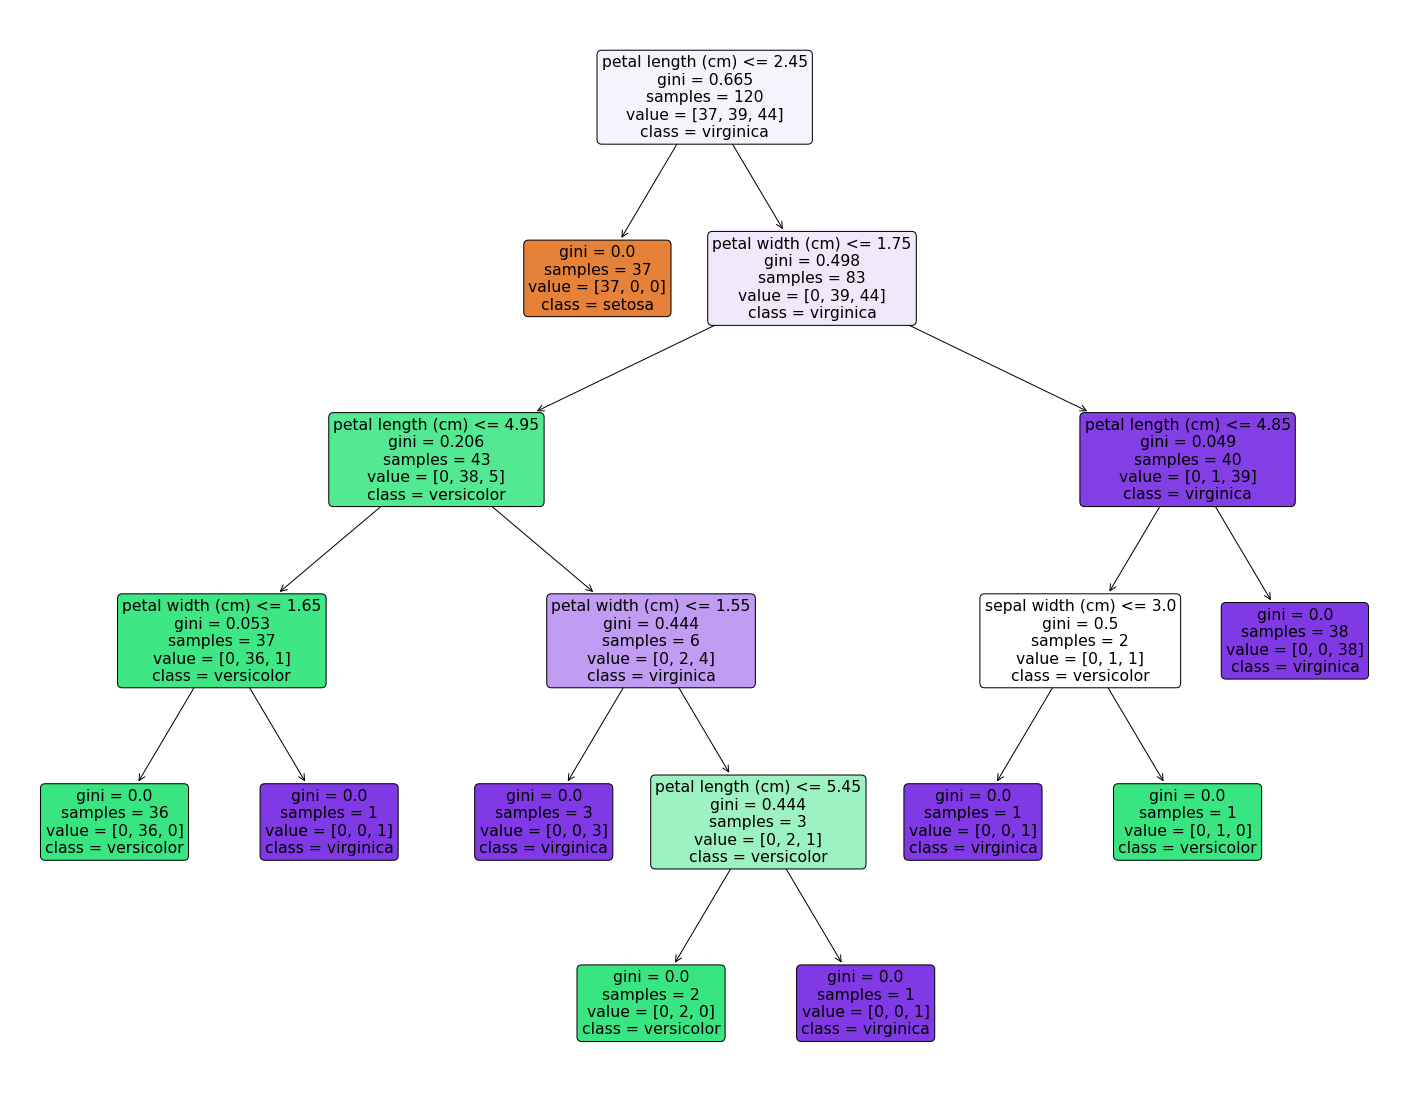

In [15]:
fig = plt.figure(figsize=(25,20))
fig = plot_tree(model_dt, feature_names = iris.feature_names, class_names = iris.target_names,
               rounded = True,
               filled = True)

## THANKYOU